# CE-676 - Physical Oceanography - Homework



## Introduction

In Physical Oceanography the works based on programming languages like Python and Matlab is very wide. In this study we have applied the formulas we learned in Physical Oceanography lessons with using the given data.


We have used Python libraries such as gsw, mathplotlib, xarray and numpy while applying the formulas. Therefore we have to import those libraries.

## Import Data and Libraries

Open the link select your drive account and copy the authentication code and paste below.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import os
os.chdir('/gdrive/My Drive/')

In [ ]:
!ls *.nc

Ssect_2000.nc  Tauxsect_2000.nc  Tsect_2000.nc


Our data are in "Ssect_2000.nc", "Tauxsect_2000.nc" and "Tsect_2000.nc"

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from math import sqrt, pi, sin
%matplotlib inline
import numpy as np

In [ ]:
df = xr.open_dataset('Tsect_2000.nc')
ds = xr.open_dataset('Ssect_2000.nc')
dt = xr.open_dataset('Tauxsect_2000.nc')

In [ ]:
df

<xarray.Dataset>
Dimensions:  (lev: 35, x: 400)
Coordinates:
    lat      (x) float32 ...
    lon      (x) float32 ...
  * x        (x) float64 -99.87 -99.62 -99.36 -99.11 ... 0.02098 0.2693 0.5177
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    y        float64 ...
    year     int32 ...
Data variables:
    thetao   (lev, x) float32 ...

"Tsect_2000.nc" dataset consist of *theta*, longitude, latitude and levels (m)

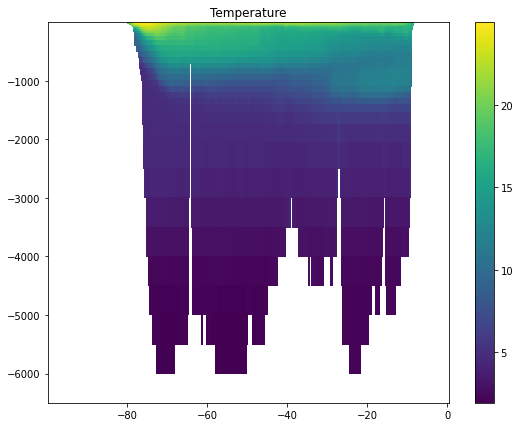

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Temperature')
plt.pcolormesh(df.x, -df.lev, df.thetao);plt.colorbar();

These plot show the temperature of the cross-section

Our cross-section is in 32.375427 latitude

In [ ]:
df.lat

<xarray.DataArray 'lat' (x: 400)>
array([32.375427, 32.375427, 32.375427, ..., 32.375427, 32.375427, 32.375427],
      dtype=float32)
Coordinates:
    lat      (x) float32 32.38 32.38 32.38 32.38 ... 32.38 32.38 32.38 32.38
    lon      (x) float32 -99.88 -99.62 -99.38 -99.12 ... -0.625 -0.375 -0.125
  * x        (x) float64 -99.87 -99.62 -99.36 -99.11 ... 0.02098 0.2693 0.5177
    y        float64 32.38
    year     int32 2001
Attributes:
    bounds:         lat_bnds
    cell_methods:   y: point x: point
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

Ssect_2000.nc dataset consist of salinity, levels, longitudes and latitude

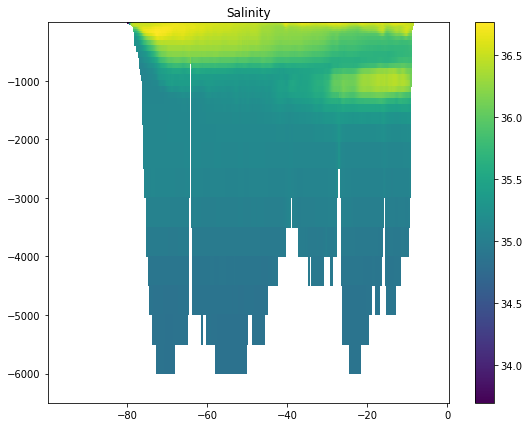

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Salinity')
plt.pcolormesh(ds.x, -ds.lev, ds.so);plt.colorbar();

This plot shows the salinity. We can see the more salinity caused Mediterranean near to Gibraltar.


Tauxsect_2000.nc dataset has wind stresses

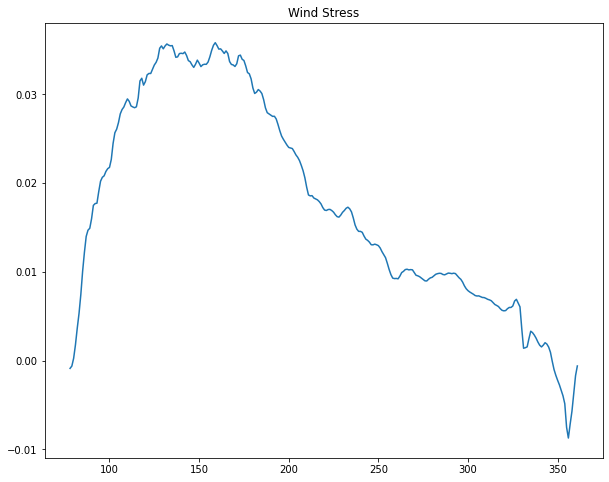

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Wind Stress')
plt.plot(dt.tauuo)

## Density Graph

We can calculate densities of given locations. For this, we need pressure, salinity and temperature. We have salinity and temperature in given datasets but we don't have pressure informations. We can calculate pressure from levels. "gsw" library has functions to calculate them. Therefore now we install and import the library.

In [ ]:
!pip install gsw

     |████████████████████████████████| 2.4MB 13.0MB/s 


In [ ]:
import gsw

In [ ]:
-df.lev

<xarray.DataArray 'lev' (lev: 35)>
array([-2.5000e+00, -1.0000e+01, -2.0000e+01, -3.2500e+01, -5.1250e+01,
       -7.5000e+01, -1.0000e+02, -1.2500e+02, -1.5625e+02, -2.0000e+02,
       -2.5000e+02, -3.1250e+02, -4.0000e+02, -5.0000e+02, -6.0000e+02,
       -7.0000e+02, -8.0000e+02, -9.0000e+02, -1.0000e+03, -1.1000e+03,
       -1.2000e+03, -1.3000e+03, -1.4000e+03, -1.5375e+03, -1.7500e+03,
       -2.0625e+03, -2.5000e+03, -3.0000e+03, -3.5000e+03, -4.0000e+03,
       -4.5000e+03, -5.0000e+03, -5.5000e+03, -6.0000e+03, -6.5000e+03])
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    y        float64 32.38
    year     int32 2001
Attributes:
    axis:         Z
    bounds:       lev_bnds
    description:  generic ocean model vertical coordinate (nondimensional or ...
    long_name:    ocean model level
    positive:     down
    units:        m

In [ ]:
latitude = 32.375427
latitude

32.375427

`gsw.p_from_z` function calculate pressure (dbar) from levels, latitude.

In [ ]:
help(gsw.p_from_z)

Help on function p_from_z in module gsw._fixed_wrapped_ufuncs:

p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
    Calculates sea pressure from height using computationally-efficient
    75-term expression for density, in terms of SA, CT and p (Roquet et al.,
    2015).  Dynamic height anomaly, geo_strf_dyn_height, if provided,
    must be computed with its p_ref = 0 (the surface). Also if provided,
    sea_surface_geopotental is the geopotential at zero sea pressure. This
    function solves Eqn.(3.32.3) of IOC et al. (2010) iteratively for p.
    
    Parameters
    ----------
    z : array-like
        Depth, positive up, m
    lat : array-like
        Latitude, -90 to 90 degrees
    geo_strf_dyn_height : array-like
        dynamic height anomaly, m^2/s^2
            Note that the reference pressure, p_ref, of geo_strf_dyn_height must
            be zero (0) dbar.
    sea_surface_geopotential : array-like
        geopotential at zero sea pressure,  m^2/s^2
    


###Convert depth to pressure (dbar)

In [ ]:
p = gsw.p_from_z(-df.lev, latitude, geo_strf_dyn_height=0, sea_surface_geopotential=0)
p

<xarray.DataArray 'lev' (lev: 35)>
array([2.51763096e+00, 1.00707085e+01, 2.01419096e+01, 3.27316033e+01,
       5.16175861e+01, 7.55423148e+01, 1.00729238e+02, 1.25919234e+02,
       1.57411049e+02, 2.01507651e+02, 2.51915273e+02, 3.14942046e+02,
       4.03211681e+02, 5.04137135e+02, 6.05111441e+02, 7.06134515e+02,
       8.07206278e+02, 9.08326647e+02, 1.00949554e+03, 1.11071288e+03,
       1.21197857e+03, 1.31329255e+03, 1.41465472e+03, 1.55410624e+03,
       1.76980067e+03, 2.08739043e+03, 2.53279592e+03, 3.04293667e+03,
       3.55424709e+03, 4.06671675e+03, 4.58033524e+03, 5.09509212e+03,
       5.61097700e+03, 6.12797952e+03, 6.64608936e+03])
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    y        float64 32.38
    year     int32 2001
Attributes:
    axis:         Z
    bounds:       lev_bnds
    description:  generic ocean model vertical coordinate (nondimensional or ...
    long_name:    ocean model level
    positive:     down
    units:        m

In [ ]:
aa = np.copy(ds.so)
aa.shape

(35, 400)

`gsw.rho` function calculate the density from salinity, temrepature and pressure.

In [ ]:
Sa = ds.so
Ct = df.thetao
help(gsw.rho)

Help on function rho in module gsw._wrapped_ufuncs:

rho(SA, CT, p)
    Calculates in-situ density from Absolute Salinity and Conservative
    Temperature, using the computationally-efficient expression for
    specific volume in terms of SA, CT and p  (Roquet et al., 2015).
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    CT : array-like
        Conservative Temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    
    Returns
    -------
    rho : array-like, kg/m
        in-situ density



In [ ]:
rho = gsw.rho(Sa, Ct, p)
rho.mean()

<xarray.DataArray 'so' ()>
array(1031.78044714)
Coordinates:
    y        float64 32.38
    year     int32 2001

We can see mean density is 1031.78 dbar.

In [ ]:
rho_zero = rho.min().values

Now we can plot the density gradient into the cross-section.

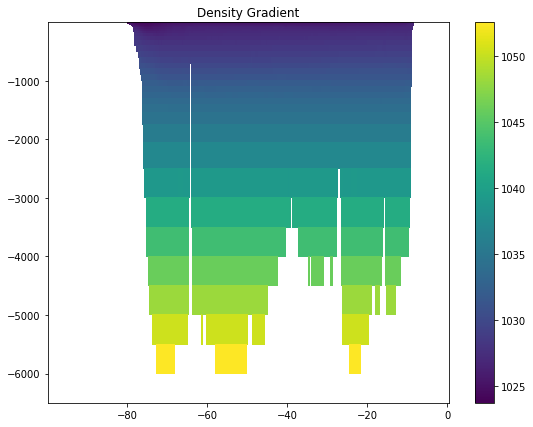

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Density Gradient')
plt.pcolormesh(ds.x, -ds.lev, rho.values);plt.colorbar();

In [ ]:
Ct[:,85]

<xarray.DataArray 'thetao' (lev: 35)>
array([24.430902, 24.328085, 23.88244 , 22.887335, 21.318243, 19.272509,
       16.38816 , 14.398585, 12.582911, 10.768791,  9.92564 ,  9.741211,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan], dtype=float32)
Coordinates:
    lat      float32 32.38
    lon      float32 -78.62
    x        float64 -78.27
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    y        float64 32.38
    year     int32 2001

To see these 3 parameters better we can plot them into a 3D figure below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Pressure')

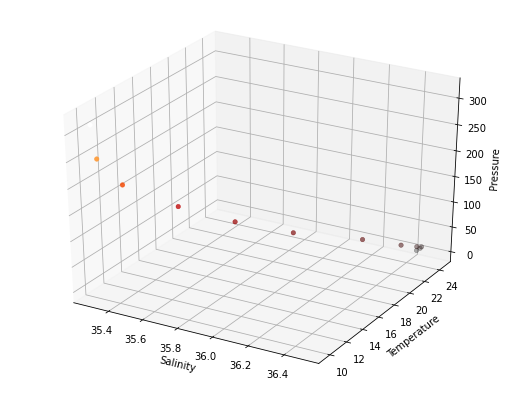

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Salinity-Temperature-Pressure')
ax = plt.axes(projection='3d')
ax.scatter(Sa[:,85], Ct[:,85], p, c=p, cmap='gist_heat', linewidth=0.5,);
ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature')
ax.set_zlabel('Pressure')

## Ts Diagram

To see relation between salinity and temperature we can plot a T/S diagram in longitude -78.62. Lower salinity cause lower pressure and density.

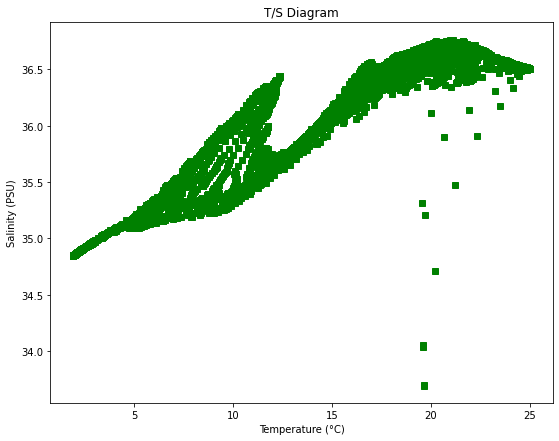

In [ ]:
plt.figure(figsize=(9,7))
plt.title('T/S Diagram')
# plt.scatter(Ct.values,Sa.values)
plt.plot(Ct.values, Sa.values, 'gs')
plt.xlabel("Temperature (°C)")
plt.ylabel("Salinity (PSU)")
plt.show()

`gsw.CT_freezing` function can calculate freezing temrepature from the salinity , pressure and saturation fraction.

In [ ]:
help(gsw.CT_freezing)

Help on function CT_freezing in module gsw._wrapped_ufuncs:

CT_freezing(SA, p, saturation_fraction)
    Calculates the Conservative Temperature at which seawater freezes.  The
    Conservative Temperature freezing point is calculated from the exact
    in-situ freezing temperature which is found by a modified Newton-Raphson
    iteration (McDougall and Wotherspoon, 2014) of the equality of the
    chemical potentials of water in seawater and in ice.
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    saturation_fraction : array-like
        Saturation fraction of dissolved air in seawater. (0..1)
    
    Returns
    -------
    CT_freezing : array-like, deg C
        Conservative Temperature at freezing of seawater
        That is, the freezing temperature expressed in terms of
        Conservative Temperature (ITS-90).



In [ ]:
freezing = gsw.CT_freezing(Sa,p,0)

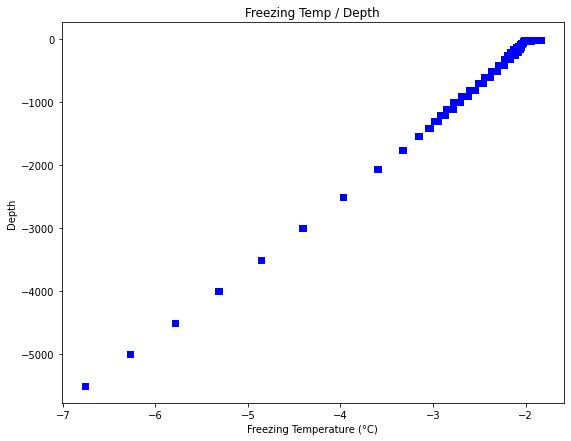

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Freezing Temp / Depth')
# plt.scatter(Ct.values,Sa.values)
plt.plot(freezing.values, -df.lev, 'bs')
plt.xlabel("Freezing Temperature (°C)")
plt.ylabel("Depth")
plt.show()

We can see from the plot above that freezing temperature is about -2 C near the surface, as it approaches a depth of 6500 meters, it decreases towards -7 C.
> It is	consistent, because we know that ocean water starts to freeze from the surface.



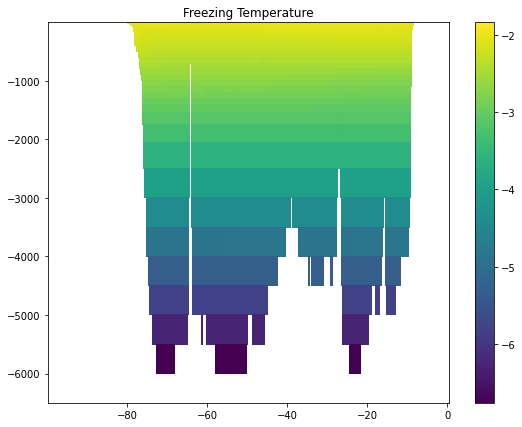

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Freezing Temperature')
plt.pcolormesh(df.x, -df.lev, freezing);plt.colorbar();

##Hydrostatic Balance

We have learnt Hydrostatic Balance formula shown below.

In [ ]:
%%latex
$\ \frac{\ -1 } {\rho} \frac{\partial p}{\partial x} = g $

<IPython.core.display.Latex object>

We can see a partial difference term in the formula. If we integrate the equation:

In [ ]:
g = 9.82

In [ ]:
%%latex
$\ \int \frac{\ -1 } {\rho} \frac{\partial p}{\partial x} = \int g $

<IPython.core.display.Latex object>

In [ ]:
%%latex
$\ \frac{\ -p } {\rho} = gz+c $

<IPython.core.display.Latex object>

Now we have an constant term (c). To find out c we can use the equation in the water surface. We know that water pressure at the surface is zero. 

In [ ]:
pmax = p.max()
pmax.values

array(6646.08936396)

In [ ]:
c=(-1*pmax.values)/1031.78044714 - (6000*g)
c

-58926.441379445

So we found c as -58926.441379445 and our formula turned out to:

In [ ]:
%%latex
$\ \frac{\ -p } {\rho} = gz-58926.4414 $

<IPython.core.display.Latex object>

In [ ]:
%%latex
$\ {p}= {\rho} (58926.4414-gz)  $

<IPython.core.display.Latex object>

In [ ]:
p_HB = rho[:, 85].values*(58926.4414 - (g*df.lev.values))
p_HB

array([60343157.01287297, 60272454.06718594, 60183339.08295384,
       60078460.73764706, 59919440.87737861, 59712660.65005118,
       59497251.91275038, 59267295.47164183, 58971715.68363356,
       58551671.2543539 , 58064107.44180189, 57449817.67013754,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan])

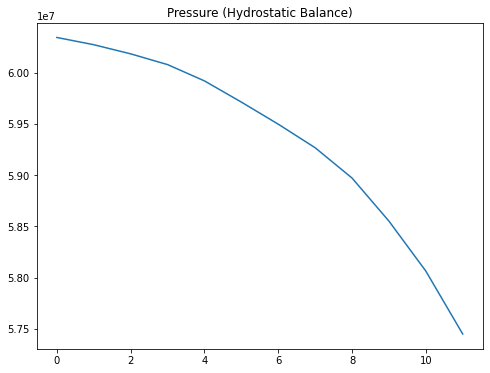

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Pressure (Hydrostatic Balance)')
plt.plot(p_HB)

##Geostrophic Balance

According to geostrophic balance velocity in x direction is:

In [ ]:
%%latex
$\ {v}_{g} = \frac{\ -1 } {f \rho} \frac{\partial p}{\partial x} $

<IPython.core.display.Latex object>

According to geostrophic balance velocity in y direction is:

In [ ]:
%%latex
$\ {u}_{g} = \frac{\ -1 } {f \rho} \frac{\partial p}{\partial y} $

<IPython.core.display.Latex object>

In those formula f is coriolis coefficent which is using to find coriolis force:

In [ ]:
%%latex
$\ {F} = {-2m } ({\omega} \times v) $

<IPython.core.display.Latex object>

In [ ]:
%%latex
$\ {f} = 2{\Omega}sin{\varphi} $

<IPython.core.display.Latex object>

`gsw.geostrophy.f` function helps to find f for the formula of coriolis force from latitude.


In [ ]:
help(gsw.geostrophy.f)

Help on function f in module gsw.geostrophy:

f(lat)
    Coriolis parameter in 1/s for latitude in degrees.



In [ ]:
f = gsw.geostrophy.f(df.lat)
f.tail(50)

<xarray.DataArray 'lat' (x: 50)>
array([7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05,
       7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05, 7.80934e-05],
      dtype=float32)
Coordinates:
    lat      (x) float32 32.38 32.38 32.38 32.38 ... 32.38 32.38 32.38 32.38
    lon      (x) float32 -12.38 -12.12 -11.88 -11.62 ... -0.625 -0.375 -0.125
  * x        (x) float64 -11.66 -11.42 -11.17 -10.92 ... 0.02098 0.2693 0.5177
    y        float64 32.38
    year     int32 2001

Our latitude is constant so our coriolis coefficent is also constant (7.809e-05)

Now we can calculate u and v

We can use helper functions from gsw library or we can calculate from the formula

In [ ]:
help(gsw.geostrophy.geostrophic_velocity)

Help on function geostrophic_velocity in module gsw.geostrophy:

geostrophic_velocity(geo_strf, lon, lat, p=0, axis=0)
    Calculate geostrophic velocity from a streamfunction.
    
    Calculates geostrophic velocity relative to a reference pressure,
    given a geostrophic streamfunction and the position of each station
    in sequence along an ocean section.  The data can be from a single
    isobaric or "density" surface, or from a series of such surfaces.
    
    Parameters
    ----------
    geo_strf : array-like, 1-D or 2-D
        geostrophic streamfunction; see Notes below.
    lon : array-like, 1-D
        Longitude, -360 to 360 degrees
    lat : array-like, 1-D
        Latitude, degrees
    p : float or array-like, optional
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar.
        This used only for a tiny correction in the distance calculation;
        it is safe to omit it.
    axis : int, 0 or 1, optional
        The axis or dimension along which pressur

In [ ]:
%%latex
$\ {v}_{g} = \frac{\ -1 } {f \rho} \frac{\partial p}{\partial x} $

<IPython.core.display.Latex object>

We have a numeric soliton for the partial term.

In [ ]:
%%latex
$\ \frac{\partial p}{\partial x} = \frac{\Delta p } {\Delta x}  = \frac{{p}_{n}-{p}_{n-1}} {dx} $

<IPython.core.display.Latex object>

In [ ]:
p.shape
dp =np.empty([35,1], dtype=float)
for i in np.arange(1, 34):
  dp[i] = p.values[i+1]-p.values[i]
dp [34] = float("nan")
# dp

We have calculated dp now we should calculate dx. We have two way to find it.

In [ ]:
dlon = df.lon.values
dlat = df.lat.values

`gsw.distance` helps to find distance in given location.

In [ ]:
dx = gsw.distance(dlon,dlat)
dx = dx[0]

In [ ]:
print ("dx=", dx, "m")

dx= 23477.626167212766 m


*Distance also can calculated from https://www.nhc.noaa.gov/gccalc.shtml*


In [ ]:
dp.shape

(35, 1)

In [ ]:
vg = -1*(dp/dx*(f[0].values*rho))
vg.max().values

array(-0.)

Now we can plot the Vg values:

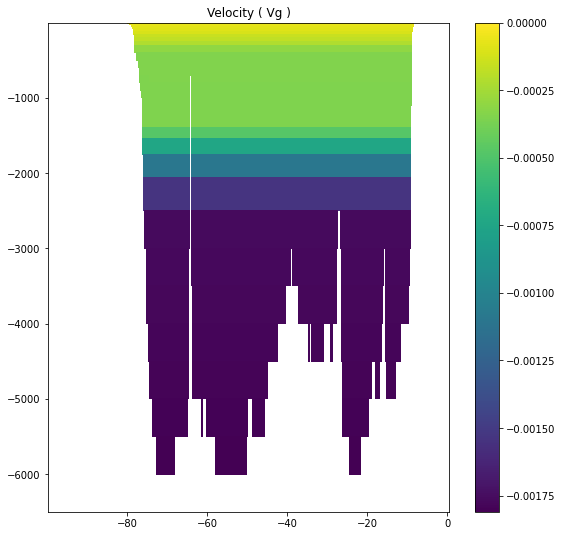

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Velocity ( Vg )')
plt.pcolormesh(df.x, -df.lev, vg);plt.colorbar();

Same calculations have done in y direction to find u velocity.

In [ ]:
dy = df.lat[1:]-df.lat[:-1]
dy.max()
df.y

<xarray.DataArray 'y' ()>
array(32.375425)
Coordinates:
    y        float64 32.38
    year     int32 2001
Attributes:
    axis:           Y
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate
    units:          degrees

In [ ]:
dt.tauuo.values
dt

<xarray.Dataset>
Dimensions:  (x: 400)
Coordinates:
    lat      (x) float32 ...
    lon      (x) float32 ...
  * x        (x) float64 -99.87 -99.62 -99.36 -99.11 ... 0.02098 0.2693 0.5177
    y        float64 ...
    year     int32 ...
Data variables:
    tauuo    (x) float32 nan nan nan nan nan nan nan ... nan nan nan nan nan nan

In [ ]:
df.lev

<xarray.DataArray 'lev' (lev: 35)>
array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01, 7.5000e+01,
       1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02, 2.5000e+02, 3.1250e+02,
       4.0000e+02, 5.0000e+02, 6.0000e+02, 7.0000e+02, 8.0000e+02, 9.0000e+02,
       1.0000e+03, 1.1000e+03, 1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03,
       1.7500e+03, 2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    y        float64 32.38
    year     int32 2001
Attributes:
    axis:         Z
    bounds:       lev_bnds
    description:  generic ocean model vertical coordinate (nondimensional or ...
    long_name:    ocean model level
    positive:     down
    units:        m

In [ ]:
taux = dt.tauuo.values
# taux

##Ekman Layer

We can also [Compute](https://en.wikipedia.org/wiki/Ekman_layer#Solution) Ekman Layer Depth with using f in the given latitude 


> f = 7.81E-5:



In [ ]:
Km = 0.1 # U10 assumed approximately 5
f_lat = f.values[0]
DEk = sqrt(2*Km/abs(f_lat))
print ("Depth of Ekman Layer is approximately",round(DEk,3), "m")

Depth of Ekman Layer is approximately 50.607 m


In [ ]:
def deg_to_rad(deg):
  rad = (pi/180)*deg
  return rad

In [ ]:
df.lat.values[0]

32.375427

In [ ]:
U10 = DEk*sqrt(sin(deg_to_rad(df.lat.values[0])))/7.6
print(round(U10))

5


U10 value is consistent, so we can calculate V0 velocity

In [ ]:
V0 = 0.0127/((sqrt(sin(deg_to_rad(df.lat.values[0]))))*U10)
print("V0 Ekman velocity found as ", round(V0,4), "m/s")

V0 Ekman velocity found as  0.0036 m/s


### Ekman Transport

After the finding Ekman layer depth, we can find the Ekman transport value from the formula shown below.

In [ ]:
%%latex
$\ {V}_{Ek} = - \frac{{\tau}_{x}}{{\rho}_{0}f} $

<IPython.core.display.Latex object>

In [ ]:
VEk = -1*taux/(rho*f)
# VEk[0].values

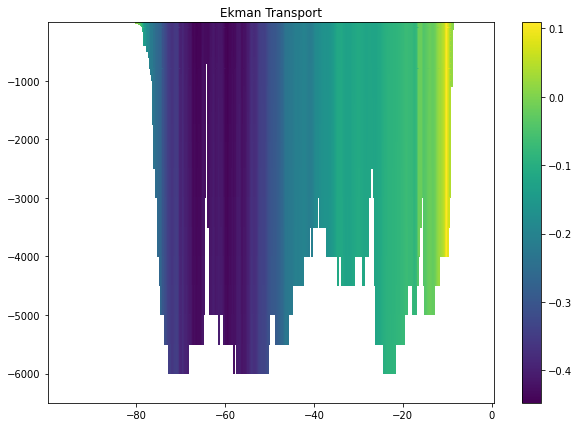

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Ekman Transport')
plt.pcolormesh(df.x, -df.lev, VEk);plt.colorbar();

##Thermal Wind Balance

Density Gradient is important for thermal wind balance. Therefore let's look at the Density Gradient figure again

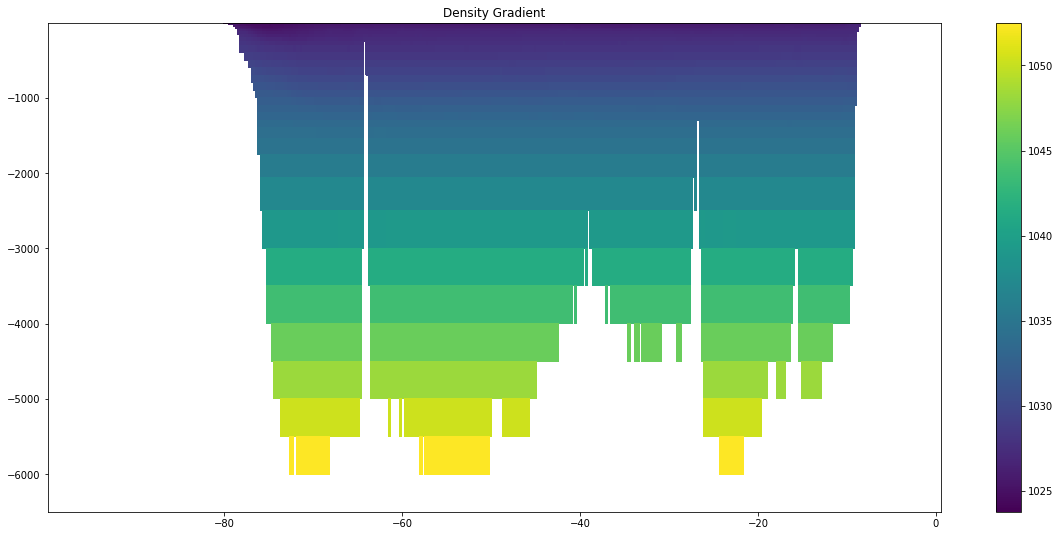

In [ ]:
plt.figure(figsize=(20,9))
plt.title('Density Gradient')
plt.pcolormesh(ds.x, -ds.lev, rho.values);plt.colorbar();

2D Velocity is depend on z direction and x direction 


---



---


V(z,x)

In [ ]:
%%latex
$\ \frac{\partial v}{\partial z} = \frac{g}{f {\rho}_{0}} \frac{\partial {\rho}^\prime }{\partial x} $

<IPython.core.display.Latex object>

The last term in the formula is density gradient. So if we apply the formula:

In [ ]:
v = (g*rho)/(f*rho_zero*dx)

In [ ]:
v.min()

<xarray.DataArray ()>
array(5.35602993)
Coordinates:
    y        float64 32.38
    year     int32 2001

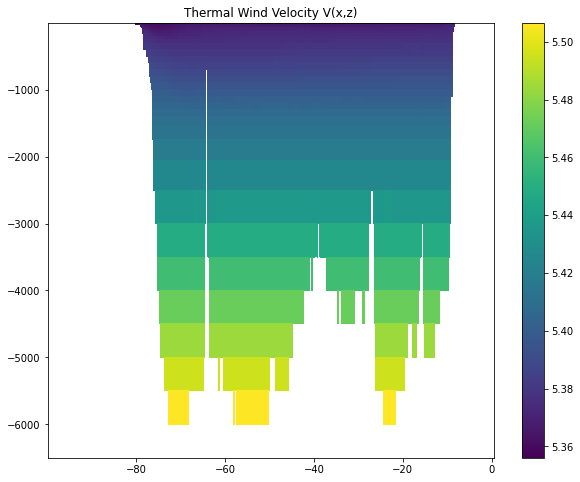

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Thermal Wind Velocity V(x,z)')
plt.pcolormesh(df.x, -df.lev, v);plt.colorbar();